# Stocks Adjusted Close Price  Comparison with Python  

## Importing the required libraries:

In [1]:
import pandas as pd
import yfinance as yf
from yahoofinancials import YahooFinancials
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## Time window & the stocks list for comparison:

In [45]:
start_date,end_date='2020-01-01', '2022-11-16'                    

In [52]:
stocks = ['MSFT','AAPL','META']

In [53]:
dates = pd . date_range ( start_date , end_date )

### Functions to merge the stocks into a single dataframe & plot them together:

In [54]:
def stocks_price(stocks, start_date, end_date):
    df_merged = pd.DataFrame (index = dates) 
    for stock in stocks:
        df_temp = yf.download(stock , start=start_date, end=end_date, progress=False)
        df_temp = df_temp. rename ( columns ={'Adj Close':stock})
        df_temp = df_temp.loc [:, stock]
        df_merged = df_merged.join(df_temp , how ='inner')
    return df_merged
    

In [55]:
df1 = stocks_price(stocks, start_date, end_date)
df1

,MSFT,AAPL,META
2020-01-02,156.592026,73.561546,209.779999
2020-01-03,154.642136,72.846367,208.669998
2020-01-06,155.041870,73.426826,212.600006
2020-01-07,153.628235,73.081497,213.059998
2020-01-08,156.075272,74.257111,215.220001
...,...,...,...
2022-11-09,224.509995,134.869995,101.470001
2022-11-10,242.979996,146.869995,111.870003
2022-11-11,247.110001,149.699997,113.019997
2022-11-14,241.550003,148.279999,114.220001


In [56]:
def normalize_data ( df ) :
    df = df / df . iloc [0 ,:]
    return df

In [57]:
def plot_data ( df , title =" Stock prices ") :
    ax = df . plot ( title = title , fontsize =12)
    ax . set_xlabel (" Date ")
    ax . set_ylabel (" Adj. Closing price ")
    
    years = mdates.YearLocator()   # every year
    months = mdates.MonthLocator()  # every month
    yearsFmt = mdates.DateFormatter('%Y')
    monthsFmt = mdates.DateFormatter('%b')
    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(yearsFmt)
    ax.xaxis.set_minor_locator(months)
    ax.xaxis.set_minor_formatter(monthsFmt)
    ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')

    ax.grid(True)
    plt.rcParams["figure.figsize"] = (14,3)
    plt.xticks(rotation = 90)
    plt . show ()


In [58]:
def plot_selected ( df ,  start_ind , end_ind,columns, normalized=False) :
    #print (df . loc [ start_ind : end_ind , columns ])
    if normalized:
        plot_data ( normalize_data(df.loc[ start_ind : end_ind , columns ]), title ="Normalized Stock prices")
    else:
        plot_data ( df.loc[ start_ind : end_ind , columns ], title =" Stock prices ")

### Adj. Close Price:

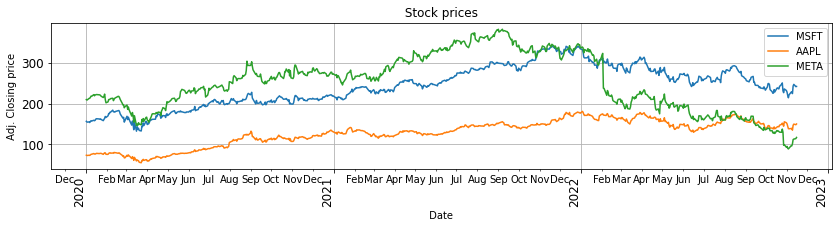

In [61]:
plot_selected (df1, start_date,end_date,stocks )

### Normalized Adj. Close Price:

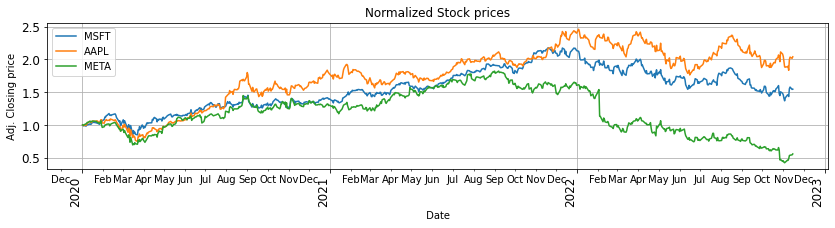

In [62]:
plot_selected (df1, start_date,end_date,stocks,normalized= True )